1. 인공신경망 keras 소개
2. keras를 이용한 인공신경망 만들기 실습
3. 로지스틱 회귀분석 실습

1. keras

keras 는 딥러닝 라이브러리

딥러닝에서 많이 사용하는 라이브러리 

구글 : tenserflow
페이스북 : pytorch
theano

keras는 tenserflow 와 theano 를 백엔드로 사용한다.

장점 : 직관적으로 모델을 만들 수 있음.
    cnn, rnn 을 keras 안에서 구현할 수 있음
    
    쉽게 만들 수 있다.
    
    
keras 모델 만드는 방법 두 가지

sequential model : 레이어를 순차적으로 쌓는 모델, 입력층, 은닉층, 출력층을 차곡차곡 쌓아간다.
functional api : 훨씬더 flexible, 하지만 복잡

우리는 주로 시퀀셜 모델을 만듬



In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from keras import models
from keras import layers

In [2]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
X = np.array(data_df)
y = cancer.target
print(len(y[y==1])/len(y[y==0]))

#스케일링
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 151)



1.6839622641509433


In [5]:
X_train.shape
455*30
128 * 200

25600

In [24]:
#우리는 주로 딥러닝에서 시퀀셜 모델을 많이 사용함

model = models.Sequential() #시퀀셜 모델 생성

#만든 시퀀셜 모델에 층층이 쌓아갈 것임.
#뉴럴 네트웍을 만들건데 입력층부터 쌓을 필요 없이 히든부터
#layers.Dense 의 Dense는 앞의 것과 이어진다는 의미

#첫 번재 히든 레이어 쌓기
#히든 레이어의 노드 숫자 4개, 활성화 함수 relu
#첫 번째 히든 레이어 경우에는 input 이 어떻게 되어 있는지 input 의 구조를 넣어줘야 한다. (변수 몇 개? shape를 통해서 넣어줄 수 있음)
#input 의 구조를 input_dim 파라미터로 넣어준다.
model.add(layers.Dense(4, activation = 'relu', input_dim = X_train.shape[1])) 

#두 번째 히든 레이어 쌓기
#두 번째는 input_dim 을 줄 필요가 없다.
model.add(layers.Dense(4, activation = 'relu'))

#히든 레이어가 아니라 output 레이어가 된 것
model.add(layers.Dense(1, activation='sigmoid'))


print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 124       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
#모델 학습 정의는 model.compile

#학습 정의
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics =['accuracy'])

#실세 학습
#model.fit
history = model.fit(X_train, y_train, epochs = 200, batch_size = 128,
                   validation_split=0.3, class_weight={0:1.68,1:1})

Epoch 1/200
3/3 [==============================] - 2s 182ms/step - loss: 0.8706 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5182
Epoch 2/200
3/3 [==============================] - 0s 52ms/step - loss: 0.8700 - accuracy: 0.5409 - val_loss: 0.6921 - val_accuracy: 0.5985
Epoch 3/200
3/3 [==============================] - 0s 20ms/step - loss: 0.8695 - accuracy: 0.5881 - val_loss: 0.6918 - val_accuracy: 0.5985
Epoch 4/200
3/3 [==============================] - 0s 26ms/step - loss: 0.8691 - accuracy: 0.6069 - val_loss: 0.6913 - val_accuracy: 0.6423
Epoch 5/200
3/3 [==============================] - 0s 47ms/step - loss: 0.8686 - accuracy: 0.6195 - val_loss: 0.6904 - val_accuracy: 0.7226
Epoch 6/200
3/3 [==============================] - 0s 44ms/step - loss: 0.8681 - accuracy: 0.6824 - val_loss: 0.6898 - val_accuracy: 0.7664
Epoch 7/200
3/3 [==============================] - 0s 109ms/step - loss: 0.8677 - accuracy: 0.7107 - val_loss: 0.6891 - val_accuracy: 0.7956
Epoch 8/200
3/3 [=

3/3 [==============================] - 0s 17ms/step - loss: 0.7412 - accuracy: 0.8711 - val_loss: 0.5617 - val_accuracy: 0.9051
Epoch 118/200
3/3 [==============================] - 0s 30ms/step - loss: 0.7395 - accuracy: 0.8868 - val_loss: 0.5597 - val_accuracy: 0.9051
Epoch 119/200
3/3 [==============================] - 0s 18ms/step - loss: 0.7379 - accuracy: 0.8899 - val_loss: 0.5573 - val_accuracy: 0.9051
Epoch 120/200
3/3 [==============================] - 0s 26ms/step - loss: 0.7360 - accuracy: 0.8742 - val_loss: 0.5552 - val_accuracy: 0.8905
Epoch 121/200
3/3 [==============================] - 0s 46ms/step - loss: 0.7342 - accuracy: 0.8711 - val_loss: 0.5537 - val_accuracy: 0.9051
Epoch 122/200
3/3 [==============================] - 0s 29ms/step - loss: 0.7326 - accuracy: 0.8774 - val_loss: 0.5517 - val_accuracy: 0.8905
Epoch 123/200
3/3 [==============================] - 0s 22ms/step - loss: 0.7308 - accuracy: 0.8742 - val_loss: 0.5502 - val_accuracy: 0.9051
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 20ms/step - loss: 0.6362 - accuracy: 0.8931 - val_loss: 0.4559 - val_accuracy: 0.9416
Epoch 176/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6343 - accuracy: 0.8931 - val_loss: 0.4545 - val_accuracy: 0.9416
Epoch 177/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6324 - accuracy: 0.8962 - val_loss: 0.4527 - val_accuracy: 0.9416
Epoch 178/200
3/3 [==============================] - 0s 27ms/step - loss: 0.6305 - accuracy: 0.8994 - val_loss: 0.4503 - val_accuracy: 0.9416
Epoch 179/200
3/3 [==============================] - 0s 25ms/step - loss: 0.6287 - accuracy: 0.8931 - val_loss: 0.4491 - val_accuracy: 0.9416
Epoch 180/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6269 - accuracy: 0.8994 - val_loss: 0.4465 - val_accuracy: 0.9416
Epoch 181/200
3/3 [==============================] - 0s 20ms/step - loss: 0.6250 - accuracy: 0.8962 - val_loss: 0.4450 - val_accuracy: 0.9416
Epoch 

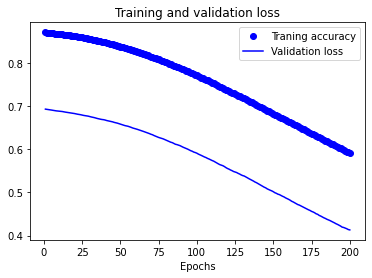

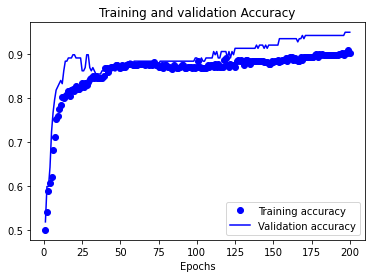

In [57]:
# 학습의 결과

# history에 학습의 결과값을 저장했는데, history.history 를 사용하면 학습의 결과값을 딕셔너리 형태로 볼 수 있다. -->
# loss, accuracy, val_loss, val_accuracy 등등이 있다.

history_dict = history.history
history_dict.keys()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)


plt.plot(epochs, loss, 'bo', label = 'Traning accuracy')
plt.plot(epochs, val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [38]:
predicted_result.shape[0]

114

In [47]:
#모델 예측
#모델이 특정 값으로 예측 값을 도출한게 아니라 확률을 도출함
#만일 0.5보다 크면 1로 아니면 0으로 바꿔줘야한다.

predicted_result = model.predict(X_test)

predicted_result.shape
predicted_target = pd.Series([1 if predicted_result[i] > 0.5 else 0 for i in range(0,predicted_result.shape[0])])
print(classification_report(y_test, predicted_target, target_names = ['no','yes']))
print(confusion_matrix(y_test, predicted_target))

              precision    recall  f1-score   support

          no       0.94      0.86      0.90        36
         yes       0.94      0.97      0.96        78

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

[[31  5]
 [ 2 76]]


In [10]:
!pip install tensorflow

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached clang-5.0.tar.gz (30 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached google_auth-1.35.0-py2.py3-none-any.whl (152 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.7.2-

In [7]:
!pip install keras


  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
